# **IDS575: Machine Learning and Statistical Methods**
## Programming Assignment 1 
## April 7, 2021
Submitted by:
1.   Minal Patil (UIN: 661688111)
2.   Daniel Simon (UIN: 676315463)
3.   Josh Wilks (UIN: 659102804)





In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

import os
os.chdir('/content/drive/MyDrive/Spring 21/IDS 575 Machine Learning and Statistical Methods for Business Analytics/Programming homework')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **PART A**: Importing libraries and loading the training and test data 

In [ ]:
from sklearn.datasets import load_svmlight_file
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

X_train, y_train = load_svmlight_file("articles.train")
X_test, y_test = load_svmlight_file("articles.test")
words = pd.read_csv("words.map.txt")

# checking the no. of features (columns/words) and no. of articles (rows) in each dataset
print(words.shape)
print(X_train.shape)
print(X_test.shape)



(61187, 1)
(4000, 51949)
(2400, 60636)


### Resizing the training and test data to match the no. of features (words)

In [ ]:
X_train.resize((X_train.shape[0], words.shape[0]))
X_test.resize((X_test.shape[0], words.shape[0]))

# confirming the no. of columns in all three datasets after resizing
print(words.shape)
print(X_train.shape)
print(X_test.shape)

(61187, 1)
(4000, 61187)
(2400, 61187)


## **PART** **B** 
### We performed the following tasks in this part:

1. Define a *train_SVM* function to perform 1-vs-all SVM hard-margin classification
2. We trained four hard margin classifiers separately for each class to perform 1-vs-all classification. The function *change_ylabels* assigns +1 to our class of interest and -1 to the remaining three classes (for example, if the model classifies class 1 vs classes 3,4,5, *change_ylabels* function would assign labels 1 to 1 and labels 3,4,5 to -1)
3. Alternatively, we also used in-built function *OneVsRestClassifier* to perform 1-vs-all classification. This is equivalent to combining results from the four different classifiers learned above

In [ ]:
from sklearn.svm import SVC

# function to change the labels for the class which is classified vs other classes in 1-vs-all
# for ex. class 1 vs classes 3,4,5 --> class 1 label would be 1, rest will be -1
def change_ylabels(arr, true_class):
  new_arr = np.where(arr==true_class,1,-1)
  return new_arr

# training SVM
# C = 1e10 is for hard margin classifier
# C value for soft-margin classifiers will be entered manually as we proceed in the assignment

def train_SVM(xdata, ydata, true_class, C, kernel='linear'):
  y_new = change_ylabels(ydata, true_class)
  if C is None:
    model = SVC(kernel = kernel, C = 1e10)
  else:
    model = SVC(kernel = kernel, C = C)
  model.fit(xdata, y_new)
  return model



### 1-vs-all SVM hard-margin classifier: **Class 1-vs-2,3,4**



In [ ]:
SVM1 = train_SVM(X_train, y_train, true_class = 1.0, C=None)

y_test_pred = SVM1.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix 
ytest_new = change_ylabels(y_test, true_class=1.0)
print(accuracy_score(ytest_new, y_test_pred))
print(confusion_matrix(ytest_new, y_test_pred))
print(y_test_pred)

0.9579166666666666
[[1783   17]
 [  84  516]]
[ 1  1  1 ... -1 -1 -1]


### 1-vs-all SVM hard-margin classifier: **Class 2-vs-1,3,4**

In [ ]:
SVM2 = train_SVM(X_train, y_train, true_class = 2.0, C=None)

y_test_pred = SVM2.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix 
ytest_new = change_ylabels(y_test, true_class=2.0)
print(accuracy_score(ytest_new, y_test_pred))
print(confusion_matrix(ytest_new, y_test_pred))
print(y_test_pred)

0.9341666666666667
[[1741   59]
 [  99  501]]
[-1 -1 -1 ... -1 -1 -1]


### 1-vs-all SVM hard-margin classifier: **Class 3-vs-1,2,4**

In [ ]:
SVM3 = train_SVM(X_train, y_train, true_class = 3.0, C=None)

y_test_pred = SVM3.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix 
ytest_new = change_ylabels(y_test, true_class=3.0)
print(accuracy_score(ytest_new, y_test_pred))
print(confusion_matrix(ytest_new, y_test_pred))
print(y_test_pred)

0.9491666666666667
[[1754   46]
 [  76  524]]
[-1 -1 -1 ... -1 -1 -1]


### 1-vs-all SVM hard-margin classifier: **Class 4-vs-1,2,3**

In [ ]:
SVM4 = train_SVM(X_train, y_train, true_class = 4.0, C=None)

y_test_pred = SVM4.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix 
ytest_new = change_ylabels(y_test, true_class=4.0)
print(accuracy_score(ytest_new, y_test_pred))
print(confusion_matrix(ytest_new, y_test_pred))
print(y_test_pred)

0.9408333333333333
[[1746   54]
 [  88  512]]
[-1 -1 -1 ...  1  1  1]


### 1-vs-all SVM hard-margin classifier using **OneVsRestClassifier**


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
ovr1 = OneVsRestClassifier((LinearSVC(random_state=0, C=1e10)).fit(X_train, y_train), n_jobs=4)

modelovr1 = ovr1.fit(X_train, y_train)
y_test_pred = modelovr1.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix 
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(y_test_pred)

0.90375
[[536  27  10  27]
 [ 17 539  17  27]
 [  9  24 549  18]
 [ 10  24  21 545]]
[1. 1. 1. ... 4. 4. 4.]


### Test accuracies of all binary classifiers are as below:

* SVM1 = 95.8% accuracy on the test data
* SVM2 = 93.4% accuracy on the test data
* SVM3 = 94.9% accuracy on the test data
* SVM4 = 94.1% accuracy on the test data
* Test accuracy of OneVsRestClassifier is 90.4%



## **PART** **C** 
### We performed the following tasks in this part:

1. Split the training data randomly into 75% for training and 25% for validation
2. We use different values of C from {0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512}, and train all four binary classifiers from part b (SVM1, SVM2, SVM3, SVM4) on the 75% training data
3. Measure the overall classification error of all four binary classifiers on the 25% validation data, and picked the C which resulted in the lowest validation error

In [ ]:
# Splitting the training data into train (75%) and validation (25%) sets

from sklearn.model_selection import train_test_split
X_train_c, X_val, y_train_c, y_val = train_test_split(X_train, y_train, test_size=0.25)

# array (-3, -2, -1,....,10) for C values which are (2^-3, 2^-2,....,2^10)
pwr = np.arange(-3,10,1)

# for each C value, training all four classifiers on the 75% training data and calculating the validation error on
# 25% validation data to pick the best C

err1 = []     # array to store misclassification error on the test data from the first binary classifier
err2 = []     # array to store misclassification error on the test data from the second binary classifier
err3 = []     # array to store misclassification error on the test data from the third binary classifier
err4 = []     # array to store misclassification error on the test data from the fourth binary classifier
cumerr = []   # array to store the overall average misclassification error on the test data from all four binary classifiers
trainerr1 = [] # array to store misclassification error on the training data from the first binary classifier
trainerr2 = [] # array to store misclassification error on the training data from the second binary classifier
trainerr3 = [] # array to store misclassification error on the training data from the third binary classifier
trainerr4 = [] # array to store misclassification error on the training data from the fourth binary classifier
for i in pwr:
  C = 2.0**i

  SVM_SM1 = train_SVM(X_train_c, y_train_c, true_class=1.0, C=C)
  error1 = 1 - accuracy_score(change_ylabels(y_val, true_class=1.0), SVM_SM1.predict(X_val))
  err1.append(error1)
  trainerr1.append(1-SVM_SM1.score(X_train_c, change_ylabels(y_train_c, true_class=1.0)))

  SVM_SM2 = train_SVM(X_train_c, y_train_c, true_class=2.0, C=C)
  error2 = 1 - accuracy_score(change_ylabels(y_val, true_class=2.0), SVM_SM2.predict(X_val))
  err2.append(error2)
  trainerr2.append(1-SVM_SM2.score(X_train_c, change_ylabels(y_train_c, true_class=2.0)))

  SVM_SM3 = train_SVM(X_train_c, y_train_c, true_class=3.0, C=C)
  error3 = 1 - accuracy_score(change_ylabels(y_val, true_class=3.0), SVM_SM3.predict(X_val))
  err3.append(error3)
  trainerr3.append(1-SVM_SM3.score(X_train_c, change_ylabels(y_train_c, true_class=3.0)))

  SVM_SM4 = train_SVM(X_train_c, y_train_c, true_class=4.0, C=C)
  error4 = 1 - accuracy_score(change_ylabels(y_val, true_class=4.0), SVM_SM4.predict(X_val))
  err4.append(error4)
  trainerr4.append(1-SVM_SM4.score(X_train_c, change_ylabels(y_train_c, true_class=4.0)))
  cumerr.append((error1+error2+error3+error4)/4)
  print("Overall misclassification_error for", C, "=", (error1+error2+error3+error4)/4) 

Overall misclassification_error for 0.125 = 0.039750000000000035
Overall misclassification_error for 0.25 = 0.04200000000000004
Overall misclassification_error for 0.5 = 0.04350000000000004
Overall misclassification_error for 1.0 = 0.04300000000000004
Overall misclassification_error for 2.0 = 0.04400000000000004
Overall misclassification_error for 4.0 = 0.04400000000000004
Overall misclassification_error for 8.0 = 0.04400000000000004
Overall misclassification_error for 16.0 = 0.04400000000000004
Overall misclassification_error for 32.0 = 0.04400000000000004
Overall misclassification_error for 64.0 = 0.04400000000000004
Overall misclassification_error for 128.0 = 0.04400000000000004
Overall misclassification_error for 256.0 = 0.04400000000000004
Overall misclassification_error for 512.0 = 0.04400000000000004


### Plotting missclassification errors against Log2(C) to see how the error vary with different values of C

*   We observed that **C = 0.125** gives the lowest average misclassification error of 3.5% on the test data (this maybe different each time we run the code because we are randomly splitting the training data into 75:25 ratio)




Text(0.5, 1.0, 'Validation error vs. Log2(C)')

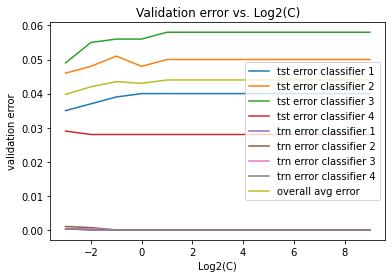

In [ ]:
# plotting missclassification errors of all four binary classifiers and the overall classification error on one plot
fig, errplots = plt.subplots()
errplots.plot(pwr,err1, label='tst error classifier 1')      #test error from first binary classifier
errplots.plot(pwr,err2, label='tst error classifier 2')      #test error from second binary classifier
errplots.plot(pwr,err3, label='tst error classifier 3')      #test error from third binary classifier
errplots.plot(pwr,err4, label='tst error classifier 4')      #test error from fourth binary classifier
errplots.plot(pwr,trainerr1, label='trn error classifier 1') #training error from first binary classifier
errplots.plot(pwr,trainerr2, label='trn error classifier 2') #training error from second binary classifier
errplots.plot(pwr,trainerr3, label='trn error classifier 3') #training error from third binary classifier
errplots.plot(pwr,trainerr4, label='trn error classifier 4') #training error from fourth binary classifier
errplots.plot(pwr,cumerr, label='overall avg error')      #avg of all 4 classifiers
errplots.set_ylabel('validation error')
errplots.set_xlabel('Log2(C)')
errplots.legend()
errplots.set_title('Validation error vs. Log2(C)')

## **PART** **D** 
### We performed the following tasks in this part:

1. We used the best C value as 0.125 picked from the part C and trained four soft margin classifiers with this C on the entire training data X_train and y_train (In part B, we trained hard margin classifiers using our function train_SVM with C = 1e10. In this part, we will be using the same function train_SVM with C = 0.125 for soft margin classifiers).
2. We compare the accuracies of these four soft-margin classifiers to those of hard-margin classifiers in part B

In [ ]:
## training soft margin classifier for class 1 vs classes 2,3,4 with C=0.125
## Class 1
SVM_SM_D1 = train_SVM(X_train, y_train, true_class = 1.0, C=0.125)

y_test_pred = SVM_SM_D1.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix 
ytest_new = change_ylabels(y_test, true_class=1.0)
print(accuracy_score(ytest_new, y_test_pred))
print(confusion_matrix(ytest_new, y_test_pred))
print(y_test_pred)

0.9616666666666667
[[1789   11]
 [  81  519]]
[ 1  1  1 ... -1 -1 -1]


### Comparing accuracies of binary classifier for class 1 vs. class 2,3,4

*   Hard margin classifier in part B    = 95.8%
*   Soft margin classifier with C 0.125 = 96.2%

Soft margin is observed to perform better in this case



In [ ]:
## training soft margin classifier for class 2 vs classes 1,3,4 with C=0.125
## Class 2
SVM_SM_D2 = train_SVM(X_train, y_train, true_class = 2.0, C=0.125)

y_test_pred = SVM_SM_D2.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix 
ytest_new = change_ylabels(y_test, true_class=2.0)
print(accuracy_score(ytest_new, y_test_pred))
print(confusion_matrix(ytest_new, y_test_pred))
print(y_test_pred)

0.94625
[[1760   40]
 [  89  511]]
[-1 -1 -1 ... -1 -1 -1]


### Comparing accuracies of binary classifier for class 2 vs. class 1,3,4

*   Hard margin classifier in part B    = 93.4%
*   Soft margin classifier with C 0.125 = 94.6%

Soft margin is observed to perform better in this case

In [ ]:
## training soft margin classifier for class 3 vs classes 1,2,4 with C=0.125
## Class 3
SVM_SM_D3 = train_SVM(X_train, y_train, true_class = 3.0, C=0.125)

y_test_pred = SVM_SM_D3.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix 
ytest_new = change_ylabels(y_test, true_class=3.0)
print(accuracy_score(ytest_new, y_test_pred))
print(confusion_matrix(ytest_new, y_test_pred))
print(y_test_pred)

0.9654166666666667
[[1782   18]
 [  65  535]]
[-1 -1 -1 ... -1 -1 -1]


### Comparing accuracies of binary classifier for class 3 vs. class 1,2,4

*   Hard margin classifier in part B    = 94.9%
*   Soft margin classifier with C 0.125 = 96.5%

Soft margin is observed to perform better in this case

In [ ]:
## training soft margin classifier for class 4 vs classes 1,2,3 with C=0.125
## Class 4
SVM_SM_D4 = train_SVM(X_train, y_train, true_class = 4.0, C=0.125)

y_test_pred = SVM_SM_D4.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix 
ytest_new = change_ylabels(y_test, true_class=4.0)
print(accuracy_score(ytest_new, y_test_pred))
print(confusion_matrix(ytest_new, y_test_pred))
print(y_test_pred)

0.9416666666666667
[[1749   51]
 [  89  511]]
[-1 -1 -1 ...  1  1  1]


### Comparing accuracies of binary classifier for class 4 vs. class 1,2,3

*   Hard margin classifier in part B    = 94.1%
*   Soft margin classifier with C 0.125 = 94.2%

Although the difference in accuracies is not significant in this case, soft margin still has higher accuracy than that of hard margin classifier

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
ovr1 = OneVsRestClassifier((LinearSVC(random_state=0, C=0.125)).fit(X_train, y_train), n_jobs=4)

modelovr1 = ovr1.fit(X_train, y_train)
y_test_pred = modelovr1.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix 
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred)) #confusion matrix with all 4 classes, all the off-diagonal values are misclassifications
print(y_test_pred)

0.9233333333333333
[[546  17  12  25]
 [ 13 554  10  23]
 [  6  19 561  14]
 [ 11  21  13 555]]
[1. 1. 1. ... 4. 4. 4.]


### Comparing accuracies of multiclass classifier OneVsRestClassifier

*   Multiclass hard margin classifier in part B = 90.4%
*   Multiclass soft margin classifier with C 0.125 = 92.3%

Soft margin multiclass classifier has higher accuracy than that of hard margin multiclass classifier

### We observed that in our case, soft margin classifiers work better than hard margin classifiers
Soft margin and hard margin classifiers work differently on different dataset. If the data is linearly separable, then hard-margin classifiers work better allowing no misclassifications, but if the data is not completely linearly separable, soft margin and hard margin may work differently.

In our case, soft margin classifiers work better, the reason behind this could be that our data is not completely linearly separable with a few data points closer to the classifying hyperplane, the model missclassifies more examples with hard margin, and gives less error with soft margin by classifying examples closer to the hyperplane correctly. 

## **PART** **E** 
### We performed the following tasks in this part:

1. We normalized our feature vectors X_train and X_test by dividing each feature with the L2 norm of the feature vector. Our normalized feature vectors are X_train_norm and X_test_norm, which we will be using in this part.
2. We compare the accuracies of these four soft-margin classifiers with normalized feature vectors to those of soft margin classifiers without normalized vectors in part D

In [ ]:
# normalizing feature vectors
from sklearn.preprocessing import normalize
X_train_norm = normalize(X_train, norm='l2', axis=1, copy=True, return_norm=False)
X_test_norm = normalize(X_test, norm='l2', axis=1, copy=True, return_norm=False)


In [ ]:
## training soft margin classifier for class 1 vs classes 2,3,4 with C=0.125 with normalized feature vectors
## Class 1

SVM_norm1 = train_SVM(X_train_norm, y_train, true_class = 1.0, C=0.125)

y_test_pred = SVM_norm1.predict(X_test_norm)
from sklearn.metrics import accuracy_score, confusion_matrix 
ytest_new = change_ylabels(y_test, true_class=1.0)
print(accuracy_score(ytest_new, y_test_pred))
print(confusion_matrix(ytest_new, y_test_pred))
print(y_test_pred)

0.9216666666666666
[[1795    5]
 [ 183  417]]
[ 1 -1 -1 ... -1 -1 -1]


### Comparing accuracies of soft margin binary classifier for class 1 vs. class 2,3,4

*   Without normalized feature vectors in part D    = 96.2%
*   With normalized feature vectors as seen above = 92.2%

We observe that soft margin classifiers with normalized feature vectors result in less accuracy or more classification error as compared to soft margin classifiers without normalized feature vectors.

In [ ]:
## training soft margin classifier for class 2 vs classes 1,3,4 with C=0.125 with normalized feature vectors
## Class 2

SVM_norm2 = train_SVM(X_train_norm, y_train, true_class = 2.0, C=0.125)

y_test_pred = SVM_norm2.predict(X_test_norm)
from sklearn.metrics import accuracy_score, confusion_matrix 
ytest_new = change_ylabels(y_test, true_class=2.0)
print(accuracy_score(ytest_new, y_test_pred))
print(confusion_matrix(ytest_new, y_test_pred))
print(y_test_pred)

0.8166666666666667
[[1800    0]
 [ 440  160]]
[-1 -1 -1 ... -1 -1 -1]


### Comparing accuracies of soft margin binary classifier for class 2 vs. class 1,3,4

*   Without normalized feature vectors in part D = 94.6%
*   With normalized feature vectors as seen above = 81.7%

We observe that soft margin classifiers with normalized feature vectors result in less accuracy or more classification error as compared to soft margin classifiers without normalized feature vectors.

In [ ]:
## training soft margin classifier for class 3 vs classes 1,2,4 with C=0.125 with normalized feature vectors
## Class 3

SVM_norm3 = train_SVM(X_train_norm, y_train, true_class = 3.0, C=0.125)

y_test_pred = SVM_norm3.predict(X_test_norm)
from sklearn.metrics import accuracy_score, confusion_matrix 
ytest_new = change_ylabels(y_test, true_class=3.0)
print(accuracy_score(ytest_new, y_test_pred))
print(confusion_matrix(ytest_new, y_test_pred))
print(y_test_pred)

0.8991666666666667
[[1795    5]
 [ 237  363]]
[-1 -1 -1 ... -1 -1 -1]


### Comparing accuracies of soft margin binary classifier for class 3 vs. class 1,2,4

*   Without normalized feature vectors in part D = 96.5%
*   With normalized feature vectors as seen above = 89.9%

We observe that soft margin classifiers with normalized feature vectors result in less accuracy or more classification error as compared to soft margin classifiers without normalized feature vectors.

In [ ]:
## training soft margin classifier for class 4 vs classes 1,2,3 with C=0.125 with normalized feature vectors
## Class 4

SVM_norm4 = train_SVM(X_train_norm, y_train, true_class = 4.0, C=0.125)

y_test_pred = SVM_norm4.predict(X_test_norm)
from sklearn.metrics import accuracy_score, confusion_matrix 
ytest_new = change_ylabels(y_test, true_class=4.0)
print(accuracy_score(ytest_new, y_test_pred))
print(confusion_matrix(ytest_new, y_test_pred))
print(y_test_pred)

0.8845833333333334
[[1788   12]
 [ 265  335]]
[-1 -1 -1 ...  1  1 -1]


### Comparing accuracies of soft margin binary classifier for class 4 vs. class 1,2,3

*   Without normalized feature vectors in part D = 94.2%
*   With normalized feature vectors as seen above = 88.5%

We observe that soft margin classifiers with normalized feature vectors result in less accuracy or more classification error as compared to soft margin classifiers without normalized feature vectors.

In [ ]:
# multiclass classifier OneVsRestClassifier with normalized feature vectors
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
ovr1 = OneVsRestClassifier((LinearSVC(random_state=0, C=0.125)).fit(X_train_norm, y_train), n_jobs=4)

modelovr1 = ovr1.fit(X_train_norm, y_train)
y_test_pred = modelovr1.predict(X_test_norm)
from sklearn.metrics import accuracy_score, confusion_matrix 
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred)) #confusion matrix with all 4 classes, all the off-diagonal values are misclassifications
print(y_test_pred)

0.9116666666666666
[[546  12  11  31]
 [ 26 517  13  44]
 [ 14   7 565  14]
 [  8  17  15 560]]
[1. 1. 1. ... 4. 4. 4.]


### Comparing accuracies of soft margin multiclass classifiers 

*   Without normalized feature vectors in part D = 92.3%
*   With normalized feature vectors as seen above = 91.2%

We observe that soft margin multiclass classifier with normalized feature vectors result in less accuracy or more classification error as compared to soft margin multiclass classifier without normalized feature vectors.

## **PART** **F** 
### We performed the following tasks in this part:

1. Till now, we have trained 1-vs-all classifiers - binary and multiclass. In this part, we train 1-vs-1 classifiers by picking a pair of classes and building a classifier to classify the pair. 
We used OneVsOneClassier to perform this task. Since we have 4 classes, this classifier trains all (4C2 = 6) binary classifiers to classify every pair of classes. This classifier then picks the class with higher votes.
2. We then compare the accuracies of our 1-vs-1 classifier with C=0.125 and normalized feature vectors to that of 1-vs-all classifier with C=0.125 and normalized feature vectors.

In [ ]:
# one-vs-one classifier with C=0.125 and normalized feature vectors
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
ovo1 = OneVsOneClassifier((LinearSVC(random_state=0, C=0.125)).fit(X_train_norm, y_train), n_jobs=6) #n-job = 6 pairs between 4 classes

modelovo1 = ovo1.fit(X_train_norm, y_train)
y_test_pred = modelovo1.predict(X_test_norm)
from sklearn.metrics import accuracy_score, confusion_matrix 
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred)) #confusion matrix with all 4 classes, all the off-diagonal values are misclassifications
print(y_test_pred)

0.8875
[[530  20  13  37]
 [ 18 519  15  48]
 [ 21  15 539  25]
 [ 11  26  21 542]]
[1. 1. 1. ... 4. 4. 4.]


### Comparing accuracies of one-vs-one and one-vs-all multiclass classifiers with C= 0.125 and normalized feature vectors

*   One-vs-all multiclass classifier in part E = 91.2%
*   One-vs-one multiclass classifier as seen above = 88.8%

We observe that one-vs-one multiclass classifier results in less accuracy or more classification error as compared to one-vs-all multiclass classifier (both with C=0.125 and normalized vectors).

## 1-vs-all performs better because it is trained on the entire dataset, assigning labels of class of interest as 1 and -1 as other class labels. Whereas, each binary classifier in 1-vs-1 is trained only on the subset of data. (For example, if one binary classifier is built for class pair 1 and 2, the classifier would only be trained on the data of these two classes). Because of this, 1-vs-1 classifier performs poor than the 1-vs-all classifier which is trained using the entire dataset. 
